# Worksheet 16

Name: Youxuan Ma

UID: U23330522

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [22]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    weighted_sum = sum(alpha_i[j] * Y[j] * np.dot(X[j], x) for j in range(len(X))) + b
    return np.sign(weighted_sum)

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict(alpha_i, b, x)
    if prediction != y:
        error = True
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
    else:
        error = False
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    format='GIF',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

#### Polynomial Kernel:

In [23]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

#### Configurable Kernel Function:

In [24]:
def predict_kernelized(alpha_i, b, x, kernel_func=polynomial, c=1, d=2):
    result = sum(alpha_i[j] * Y[j] * kernel_func(X[j], x, c, d) for j in range(len(X))) + b
    return np.sign(result)

#### Test Out On a Non-Linearly-Separable Dataset:

In [25]:
from sklearn.datasets import make_moons

TEMPFILE2 = "temp2.png"

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

# Generate non-linearly separable data
X, labels = make_moons(n_samples=30, noise=0.1, random_state=42)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE2)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE2)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict_kernelized(alpha_i, b, Z[i]))
    return np.array(res)

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict_kernelized(alpha_i, b, x)
    if prediction != y:
        error = True
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
    else:
        error = False
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'non_linear.gif',
    format='GIF',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

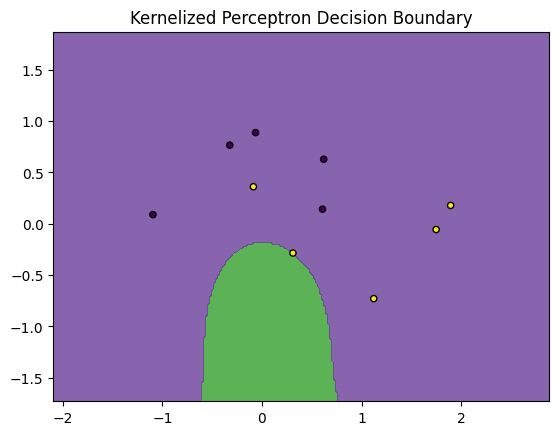

In [13]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def polynomial_kernel(x_i, x_j, c=1, n=2):
    return (np.dot(x_i, x_j) + c) ** n

def predict_kernelized(X, Y, alpha_i, b, x, kernel_func, c=1, n=2):
    result = sum(alpha_i[j] * Y[j] * kernel_func(X[j], x, c, n) for j in range(len(X))) + b
    return np.sign(result)

def train_kernelized_perceptron(X, Y, kernel_func, c=1, n=2, epochs=10, learning_rate=0.1):
    alpha_i = np.zeros(len(X))
    b = 0
    
    for epoch in range(epochs):
        for i in range(len(X)):
            prediction = predict_kernelized(X, Y, alpha_i, b, X[i], kernel_func, c, n)
            if Y[i] * prediction <= 0:
                alpha_i[i] += learning_rate * Y[i]
                b += learning_rate * Y[i]
    
    return alpha_i, b

# Generate the dataset
X, Y = make_moons(n_samples=10, noise=0.15, random_state=42)
Y = np.where(Y == 0, -1, 1)  # Adjust labels to -1 and 1 for our perceptron

# Train the kernelized perceptron
kernel_coefficient = 1
polynomial_degree = 3
alpha_i, b = train_kernelized_perceptron(X, Y, polynomial_kernel, c=kernel_coefficient, n=polynomial_degree, epochs=100, learning_rate=0.01)

def plot_decision_boundary(X, Y, alpha_i, b, kernel_func, c=1, n=2):
    # Create a mesh to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on each point in the mesh
    Z = np.array([predict_kernelized(X, Y, alpha_i, b, np.array([x, y]), kernel_func, c, n) for x, y in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(Z.min(), Z.max(), 3), cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.title('Kernelized Perceptron Decision Boundary')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, Y, alpha_i, b, polynomial_kernel, c=kernel_coefficient, n=polynomial_degree)


In [14]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

TEMPFILE2 = "temp2.png"

alpha_i = np.zeros((len(X),))
b = 0

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(X, Y, x, alpha_i, b, error, kernel_func):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(X, Y, alpha_i, b, meshData, kernel_func)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE2)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE2)))

def predict_many(X, Y, alpha_i, b, Z, kernel_func):
    res = []
    for i in range(len(Z)):
        res.append(predict_kernelized(X, Y, alpha_i, b, Z[i], kernel_func))
    return np.array(res)

def polynomial_kernel(x_i, x_j, c=1, n=2):
    return (np.dot(x_i, x_j) + c) ** n

def predict_kernelized(X, Y, alpha_i, b, x, kernel_func, c=1, n=2):
    result = sum(alpha_i[j] * Y[j] * kernel_func(X[j], x, c, n) for j in range(len(X))) + b
    return np.sign(result)

# Generate the dataset
X, Y = make_moons(n_samples=10, noise=0.15, random_state=42)
Y = np.where(Y == 0, -1, 1)  # Adjust labels to -1 and 1 for our perceptron

# Train the kernelized perceptron
kernel_coefficient = 1
polynomial_degree = 3
# alpha_i, b = train_kernelized_perceptron(X, Y, polynomial_kernel, c=kernel_coefficient, n=polynomial_degree, epochs=100, learning_rate=0.01)

# def plot_decision_boundary(X, Y, alpha_i, b, kernel_func, c=1, n=2):
#     # Create a mesh to plot the decision boundaries
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                          np.arange(y_min, y_max, 0.02))

#     # Predict on each point in the mesh
#     Z = np.array([predict_kernelized(X, Y, alpha_i, b, np.array([x, y]), kernel_func, c, n) for x, y in zip(np.ravel(xx), np.ravel(yy))])
#     Z = Z.reshape(xx.shape)

#     # Plot
#     plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(Z.min(), Z.max(), 3), cmap=plt.cm.Paired)
#     plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
#     plt.title('Kernelized Perceptron Decision Boundary')
#     plt.show()

# # Visualize the decision boundary
# plot_decision_boundary(X, Y, alpha_i, b, polynomial_kernel, c=kernel_coefficient, n=polynomial_degree)

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict_kernelized(X, Y, alpha_i, b, x, polynomial_kernel)
    if prediction != y:
        error = True
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
    else:
        error = False
        
    images.append(snap(X, Y, x, alpha_i, b, error, polynomial_kernel))

images[0].save(
    'test.gif',
    format='GIF',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    iterations=100,
    loop=0
)


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

In this case, I would lower the parameter `n` to reduce the model's complexity. 

This would lead to a smoother decision boundary that should generalize better on unseen data.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

As we learned in the lecture, a large `sigma` simplifies the model by making the decision boundary smoother, but too large a value might cause underfitting as the model becomes too generalized.

Therefore, in this case, I would decrease `sigma` to allow the model to capture more complexity in the data to combat underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

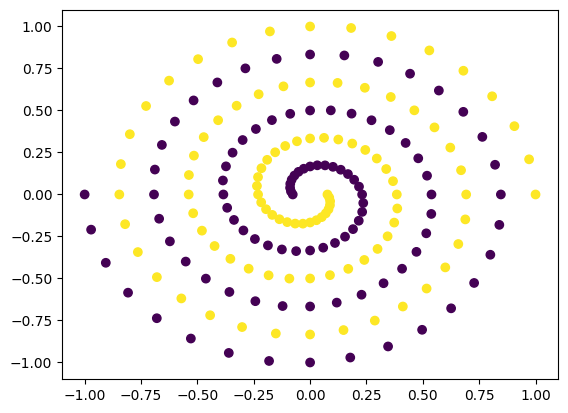

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming a synthetic spiral dataset is generated (as a placeholder for the actual data)
# For demonstration, I'll use a function that would generate a similar structure
def generate_spiral_data():
    n = 100  # number of points per class
    D = 2  # dimensionality
    K = 2  # number of classes
    X = np.zeros((n*K,D)) # data matrix (each row = single example)
    y = np.zeros(n*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(n*j,n*(j+1))
        r = np.linspace(0.0,1,n) # radius
        t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

# Generating the spiral data
x, y = generate_spiral_data()

# Plotting the generated spiral data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()


In [ ]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Setting up parameter grid for tuning
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.logspace(-9, 3, 13),
}

# Creating the model
svc = svm.SVC(kernel='rbf')

# Grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fitting the model
grid_search.fit(x_scaled, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)



In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Plotting the decision boundary for the best model
plot_decision_boundary(grid_search.best_estimator_, x_scaled, y, "SVM with RBF Kernel Decision Boundary")
